In [1]:
#!/usr/bin/python

In [2]:
import sqlite3
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect('/home/bosch/simran/Mytest1.db')
df = pd.read_sql_query("Select id, time, activepower, realtime_e, meter_id from RS485SAMPLES where meter_id = 3;", conn)
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
0,140863,2018-02-13 11:56:57,1672000.0,932678359.0,3
1,140868,2018-02-13 11:57:57,1706000.0,932706149.0,3
2,140873,2018-02-13 12:01:18,1799000.0,932805763.0,3
3,140878,2018-02-13 12:02:18,1756000.0,932835063.0,3
4,140883,2018-02-13 12:03:18,1818000.0,932865060.0,3
5,140888,2018-02-13 12:04:18,1746000.0,932894392.0,3
6,140893,2018-02-13 12:05:18,1647000.0,932923248.0,3
7,140898,2018-02-13 12:06:18,1748000.0,932951506.0,3
8,140903,2018-02-13 12:07:18,1734000.0,932980879.0,3
9,140908,2018-02-13 12:08:18,1801000.0,933010343.0,3


In [4]:
dframe = pd.read_excel('jAp_33kv_FINAL.xlsx', sheet_name='RealtimeData', usecols =[1, 2, 17, 19])
dframe.columns = ['METER_ID', 'TIME', 'ACTIVEPOWER', 'REALTIME_E']
dframe

,METER_ID,TIME,ACTIVEPOWER,REALTIME_E
0,1903,2018-04-05 06:00:07,1517.0,156058.564
1,1903,2018-04-05 06:01:07,1584.0,156084.516
2,1903,2018-04-05 06:02:07,1588.0,156110.642
3,1903,2018-04-05 06:03:07,1584.0,156136.917
4,1903,2018-04-05 06:04:07,1585.0,156162.838
5,1903,2018-04-05 06:05:07,1572.0,156189.193
6,1903,2018-04-05 06:06:07,1561.0,156215.610
7,1903,2018-04-05 06:07:07,1632.0,156241.695
8,1903,2018-04-05 06:08:07,1662.0,156269.758
9,1903,2018-04-05 06:09:07,1654.0,156297.328


In [5]:
dframe.dtypes

METER_ID         int64
TIME            object
ACTIVEPOWER    float64
REALTIME_E     float64
dtype: object

In [6]:
print (df.shape)
var1 = df['TIME'] == ""
df1 = df[var1]
print (df1)

print (dframe.shape)
var1 = dframe['TIME'] == ""
df1 = dframe[var1]
print (df1)

(135141, 5)
Empty DataFrame
Columns: [ID, TIME, ACTIVEPOWER, REALTIME_E, METER_ID]
Index: []
(40318, 4)
Empty DataFrame
Columns: [METER_ID, TIME, ACTIVEPOWER, REALTIME_E]
Index: []


In [7]:
var = df['TIME'] != ""
df = df[var]
df = df.reset_index()
del df['index']
df

var = dframe['TIME'] != ""
dframe = dframe[var]
dframe = dframe.reset_index()
del dframe['index']
dframe

,METER_ID,TIME,ACTIVEPOWER,REALTIME_E
0,1903,2018-04-05 06:00:07,1517.0,156058.564
1,1903,2018-04-05 06:01:07,1584.0,156084.516
2,1903,2018-04-05 06:02:07,1588.0,156110.642
3,1903,2018-04-05 06:03:07,1584.0,156136.917
4,1903,2018-04-05 06:04:07,1585.0,156162.838
5,1903,2018-04-05 06:05:07,1572.0,156189.193
6,1903,2018-04-05 06:06:07,1561.0,156215.610
7,1903,2018-04-05 06:07:07,1632.0,156241.695
8,1903,2018-04-05 06:08:07,1662.0,156269.758
9,1903,2018-04-05 06:09:07,1654.0,156297.328


In [8]:
mask = df['TIME'] > '2018-02-14 00:00:00'
df = df.loc[mask]
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
721,144468,2018-02-14 00:00:18,1433000.0,953510885.0,3
722,144473,2018-02-14 00:01:18,1484000.0,953535249.0,3
723,144478,2018-02-14 00:02:18,1488000.0,953560287.0,3
724,144483,2018-02-14 00:03:18,1531000.0,953586036.0,3
725,144488,2018-02-14 00:04:18,1535000.0,953611629.0,3
726,144493,2018-02-14 00:05:18,1518000.0,953636911.0,3
727,144498,2018-02-14 00:06:18,1533000.0,953662717.0,3
728,144503,2018-02-14 00:07:18,1451000.0,953687821.0,3
729,144508,2018-02-14 00:08:18,1433000.0,953712476.0,3
730,144513,2018-02-14 00:09:18,1413000.0,953736277.0,3


In [9]:
mask = dframe['TIME'] > '2018-04-05 00:00:00'
dframe = dframe.loc[mask]
dframe['ACTIVEPOWER'] = dframe['ACTIVEPOWER']*1000
dframe['REALTIME_E'] = dframe['REALTIME_E']*1000
dframe

,METER_ID,TIME,ACTIVEPOWER,REALTIME_E
0,1903,2018-04-05 06:00:07,1517000.0,156058564.0
1,1903,2018-04-05 06:01:07,1584000.0,156084516.0
2,1903,2018-04-05 06:02:07,1588000.0,156110642.0
3,1903,2018-04-05 06:03:07,1584000.0,156136917.0
4,1903,2018-04-05 06:04:07,1585000.0,156162838.0
5,1903,2018-04-05 06:05:07,1572000.0,156189193.0
6,1903,2018-04-05 06:06:07,1561000.0,156215610.0
7,1903,2018-04-05 06:07:07,1632000.0,156241695.0
8,1903,2018-04-05 06:08:07,1662000.0,156269758.0
9,1903,2018-04-05 06:09:07,1654000.0,156297328.0


In [10]:
mask = (df['ACTIVEPOWER'] < 3000000) & (df['ACTIVEPOWER'] >= 10000) #check
df = df.loc[mask]
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
721,144468,2018-02-14 00:00:18,1433000.0,953510885.0,3
722,144473,2018-02-14 00:01:18,1484000.0,953535249.0,3
723,144478,2018-02-14 00:02:18,1488000.0,953560287.0,3
724,144483,2018-02-14 00:03:18,1531000.0,953586036.0,3
725,144488,2018-02-14 00:04:18,1535000.0,953611629.0,3
726,144493,2018-02-14 00:05:18,1518000.0,953636911.0,3
727,144498,2018-02-14 00:06:18,1533000.0,953662717.0,3
728,144503,2018-02-14 00:07:18,1451000.0,953687821.0,3
729,144508,2018-02-14 00:08:18,1433000.0,953712476.0,3
730,144513,2018-02-14 00:09:18,1413000.0,953736277.0,3


In [11]:
mask = df['REALTIME_E'] < 20000000000
df = df.loc[mask]
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
721,144468,2018-02-14 00:00:18,1433000.0,953510885.0,3
722,144473,2018-02-14 00:01:18,1484000.0,953535249.0,3
723,144478,2018-02-14 00:02:18,1488000.0,953560287.0,3
724,144483,2018-02-14 00:03:18,1531000.0,953586036.0,3
725,144488,2018-02-14 00:04:18,1535000.0,953611629.0,3
726,144493,2018-02-14 00:05:18,1518000.0,953636911.0,3
727,144498,2018-02-14 00:06:18,1533000.0,953662717.0,3
728,144503,2018-02-14 00:07:18,1451000.0,953687821.0,3
729,144508,2018-02-14 00:08:18,1433000.0,953712476.0,3
730,144513,2018-02-14 00:09:18,1413000.0,953736277.0,3


In [12]:
mask = (dframe['ACTIVEPOWER'] < 3000000) & (dframe['ACTIVEPOWER'] >= 10000) #check
dframe = dframe.loc[mask]
dframe

,METER_ID,TIME,ACTIVEPOWER,REALTIME_E
0,1903,2018-04-05 06:00:07,1517000.0,156058564.0
1,1903,2018-04-05 06:01:07,1584000.0,156084516.0
2,1903,2018-04-05 06:02:07,1588000.0,156110642.0
3,1903,2018-04-05 06:03:07,1584000.0,156136917.0
4,1903,2018-04-05 06:04:07,1585000.0,156162838.0
5,1903,2018-04-05 06:05:07,1572000.0,156189193.0
6,1903,2018-04-05 06:06:07,1561000.0,156215610.0
7,1903,2018-04-05 06:07:07,1632000.0,156241695.0
8,1903,2018-04-05 06:08:07,1662000.0,156269758.0
9,1903,2018-04-05 06:09:07,1654000.0,156297328.0


In [13]:
mask = dframe['REALTIME_E'] < 20000000000
dframe = dframe.loc[mask]
dframe

,METER_ID,TIME,ACTIVEPOWER,REALTIME_E
0,1903,2018-04-05 06:00:07,1517000.0,156058564.0
1,1903,2018-04-05 06:01:07,1584000.0,156084516.0
2,1903,2018-04-05 06:02:07,1588000.0,156110642.0
3,1903,2018-04-05 06:03:07,1584000.0,156136917.0
4,1903,2018-04-05 06:04:07,1585000.0,156162838.0
5,1903,2018-04-05 06:05:07,1572000.0,156189193.0
6,1903,2018-04-05 06:06:07,1561000.0,156215610.0
7,1903,2018-04-05 06:07:07,1632000.0,156241695.0
8,1903,2018-04-05 06:08:07,1662000.0,156269758.0
9,1903,2018-04-05 06:09:07,1654000.0,156297328.0


In [14]:
df.TIME

721       2018-02-14 00:00:18
722       2018-02-14 00:01:18
723       2018-02-14 00:02:18
724       2018-02-14 00:03:18
725       2018-02-14 00:04:18
726       2018-02-14 00:05:18
727       2018-02-14 00:06:18
728       2018-02-14 00:07:18
729       2018-02-14 00:08:18
730       2018-02-14 00:09:18
731       2018-02-14 00:10:18
732       2018-02-14 00:11:18
733       2018-02-14 00:12:18
734       2018-02-14 00:13:18
735       2018-02-14 00:14:18
736       2018-02-14 00:15:18
737       2018-02-14 00:16:18
738       2018-02-14 00:17:18
739       2018-02-14 00:18:18
740       2018-02-14 00:19:18
741       2018-02-14 00:20:18
742       2018-02-14 00:21:18
743       2018-02-14 00:22:18
744       2018-02-14 00:23:18
745       2018-02-14 00:24:18
746       2018-02-14 00:25:18
747       2018-02-14 00:26:18
748       2018-02-14 00:27:18
749       2018-02-14 00:28:18
750       2018-02-14 00:29:18
                 ...         
135111    2018-06-15 09:41:53
135112    2018-06-15 09:42:53
135113    

In [15]:
df.TIME > ''

721       True
722       True
723       True
724       True
725       True
726       True
727       True
728       True
729       True
730       True
731       True
732       True
733       True
734       True
735       True
736       True
737       True
738       True
739       True
740       True
741       True
742       True
743       True
744       True
745       True
746       True
747       True
748       True
749       True
750       True
          ... 
135111    True
135112    True
135113    True
135114    True
135115    True
135116    True
135117    True
135118    True
135119    True
135120    True
135121    True
135122    True
135123    True
135124    True
135125    True
135126    True
135127    True
135128    True
135129    True
135130    True
135131    True
135132    True
135133    True
135134    True
135135    True
135136    True
135137    True
135138    True
135139    True
135140    True
Name: TIME, Length: 104985, dtype: bool

In [16]:
df[df['TIME'] > '']

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID
721,144468,2018-02-14 00:00:18,1433000.0,953510885.0,3
722,144473,2018-02-14 00:01:18,1484000.0,953535249.0,3
723,144478,2018-02-14 00:02:18,1488000.0,953560287.0,3
724,144483,2018-02-14 00:03:18,1531000.0,953586036.0,3
725,144488,2018-02-14 00:04:18,1535000.0,953611629.0,3
726,144493,2018-02-14 00:05:18,1518000.0,953636911.0,3
727,144498,2018-02-14 00:06:18,1533000.0,953662717.0,3
728,144503,2018-02-14 00:07:18,1451000.0,953687821.0,3
729,144508,2018-02-14 00:08:18,1433000.0,953712476.0,3
730,144513,2018-02-14 00:09:18,1413000.0,953736277.0,3


In [17]:
df['del_E'] = df['REALTIME_E'] - df['REALTIME_E'].shift(1)
df = df.shift(-1)
df.dropna(inplace=True)
df

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
721,144473.0,2018-02-14 00:01:18,1484000.0,953535249.0,3.0,24364.0
722,144478.0,2018-02-14 00:02:18,1488000.0,953560287.0,3.0,25038.0
723,144483.0,2018-02-14 00:03:18,1531000.0,953586036.0,3.0,25749.0
724,144488.0,2018-02-14 00:04:18,1535000.0,953611629.0,3.0,25593.0
725,144493.0,2018-02-14 00:05:18,1518000.0,953636911.0,3.0,25282.0
726,144498.0,2018-02-14 00:06:18,1533000.0,953662717.0,3.0,25806.0
727,144503.0,2018-02-14 00:07:18,1451000.0,953687821.0,3.0,25104.0
728,144508.0,2018-02-14 00:08:18,1433000.0,953712476.0,3.0,24655.0
729,144513.0,2018-02-14 00:09:18,1413000.0,953736277.0,3.0,23801.0
730,144518.0,2018-02-14 00:10:18,1417000.0,953760348.0,3.0,24071.0


In [18]:
dframe['del_E'] = dframe['REALTIME_E'] - dframe['REALTIME_E'].shift(1)
dframe = dframe.shift(-1)
dframe.dropna(inplace=True)
dframe

,METER_ID,TIME,ACTIVEPOWER,REALTIME_E,del_E
0,1903.0,2018-04-05 06:01:07,1584000.0,156084516.0,25952.0
1,1903.0,2018-04-05 06:02:07,1588000.0,156110642.0,26126.0
2,1903.0,2018-04-05 06:03:07,1584000.0,156136917.0,26275.0
3,1903.0,2018-04-05 06:04:07,1585000.0,156162838.0,25921.0
4,1903.0,2018-04-05 06:05:07,1572000.0,156189193.0,26355.0
5,1903.0,2018-04-05 06:06:07,1561000.0,156215610.0,26417.0
6,1903.0,2018-04-05 06:07:07,1632000.0,156241695.0,26085.0
7,1903.0,2018-04-05 06:08:07,1662000.0,156269758.0,28063.0
8,1903.0,2018-04-05 06:09:07,1654000.0,156297328.0,27570.0
9,1903.0,2018-04-05 06:10:07,1622000.0,156324148.0,26820.0


In [19]:
df[df['del_E'] < 0]

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
22610,253918.0,2018-03-01 04:50:18,1309000.0,3827.0,3.0,-1.524632e+09
67283,477283.0,2018-04-01 05:28:07,1285000.0,7318.0,3.0,-1.191381e+09
73589,508813.0,2018-05-03 16:05:21,2690000.0,83428890.0,3.0,-9.297067e+07
114695,714343.0,2018-06-01 05:25:33,2074000.0,24285.0,3.0,-7.800261e+08


In [20]:
df[df['del_E'] > 300000]

,ID,TIME,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
75096,516378.0,2018-05-04 17:19:31,2916000.0,142052296.0,3.0,356359.0
77839,630618.0,2018-05-20 14:20:33,751000.0,231330718.0,3.0,1702824.0
100981,645848.0,2018-05-22 17:06:33,2894000.0,315829987.0,3.0,808095.0
101824,650028.0,2018-05-23 07:02:33,2956000.0,336556251.0,3.0,467239.0
101845,650123.0,2018-05-23 07:21:33,2947000.0,337499177.0,3.0,353066.0
101861,650283.0,2018-05-23 07:53:33,2972000.0,339115751.0,3.0,1179904.0
112038,701088.0,2018-05-30 09:14:33,2934000.0,673832779.0,3.0,357604.0
112051,701158.0,2018-05-30 09:28:33,2964000.0,674530392.0,3.0,404694.0
113338,707613.0,2018-05-31 06:59:33,2879000.0,723852135.0,3.0,616853.0
113446,708133.0,2018-05-31 08:43:33,2991000.0,728737765.0,3.0,403597.0


In [21]:
#df.reset_index()
df.set_index('TIME')
#df['TIME'].resample('H').mean()
#mains_series.resample('H').mean()


,ID,ACTIVEPOWER,REALTIME_E,METER_ID,del_E
TIME,,,,,
2018-02-14 00:01:18,144473.0,1484000.0,953535249.0,3.0,24364.0
2018-02-14 00:02:18,144478.0,1488000.0,953560287.0,3.0,25038.0
2018-02-14 00:03:18,144483.0,1531000.0,953586036.0,3.0,25749.0
2018-02-14 00:04:18,144488.0,1535000.0,953611629.0,3.0,25593.0
2018-02-14 00:05:18,144493.0,1518000.0,953636911.0,3.0,25282.0
2018-02-14 00:06:18,144498.0,1533000.0,953662717.0,3.0,25806.0
2018-02-14 00:07:18,144503.0,1451000.0,953687821.0,3.0,25104.0
2018-02-14 00:08:18,144508.0,1433000.0,953712476.0,3.0,24655.0
2018-02-14 00:09:18,144513.0,1413000.0,953736277.0,3.0,23801.0


In [22]:
df['TIME'] = pd.to_datetime(df['TIME'])

In [23]:
df.dtypes

ID                    float64
TIME           datetime64[ns]
ACTIVEPOWER           float64
REALTIME_E            float64
METER_ID              float64
del_E                 float64
dtype: object

In [24]:
df = df.set_index('TIME')
var = df['ACTIVEPOWER']
var

TIME
2018-02-14 00:01:18    1484000.0
2018-02-14 00:02:18    1488000.0
2018-02-14 00:03:18    1531000.0
2018-02-14 00:04:18    1535000.0
2018-02-14 00:05:18    1518000.0
2018-02-14 00:06:18    1533000.0
2018-02-14 00:07:18    1451000.0
2018-02-14 00:08:18    1433000.0
2018-02-14 00:09:18    1413000.0
2018-02-14 00:10:18    1417000.0
2018-02-14 00:11:18    1643000.0
2018-02-14 00:12:18    1672000.0
2018-02-14 00:13:18    1684000.0
2018-02-14 00:14:18    1530000.0
2018-02-14 00:15:18    1538000.0
2018-02-14 00:16:18    1574000.0
2018-02-14 00:17:18    1473000.0
2018-02-14 00:18:18    1437000.0
2018-02-14 00:19:18    1543000.0
2018-02-14 00:20:18    1620000.0
2018-02-14 00:21:18    1570000.0
2018-02-14 00:22:18    1541000.0
2018-02-14 00:23:18    1586000.0
2018-02-14 00:24:18    1502000.0
2018-02-14 00:25:18    1402000.0
2018-02-14 00:26:18    1443000.0
2018-02-14 00:27:18    1467000.0
2018-02-14 00:28:18    1497000.0
2018-02-14 00:29:18    1388000.0
2018-02-14 00:30:18    1367000.0
     

In [25]:
dframe['TIME'] = pd.to_datetime(dframe['TIME'])
dframe = dframe.set_index('TIME')
dframe

,METER_ID,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,,
2018-04-05 06:01:07,1903.0,1584000.0,156084516.0,25952.0
2018-04-05 06:02:07,1903.0,1588000.0,156110642.0,26126.0
2018-04-05 06:03:07,1903.0,1584000.0,156136917.0,26275.0
2018-04-05 06:04:07,1903.0,1585000.0,156162838.0,25921.0
2018-04-05 06:05:07,1903.0,1572000.0,156189193.0,26355.0
2018-04-05 06:06:07,1903.0,1561000.0,156215610.0,26417.0
2018-04-05 06:07:07,1903.0,1632000.0,156241695.0,26085.0
2018-04-05 06:08:07,1903.0,1662000.0,156269758.0,28063.0
2018-04-05 06:09:07,1903.0,1654000.0,156297328.0,27570.0


In [26]:
print (dframe.dtypes)
print (" ")
print(df.dtypes)

METER_ID       float64
ACTIVEPOWER    float64
REALTIME_E     float64
del_E          float64
dtype: object
 
ID             float64
ACTIVEPOWER    float64
REALTIME_E     float64
METER_ID       float64
del_E          float64
dtype: object


In [27]:
df.drop(('ID'), axis=1, inplace=True)
df.drop(('METER_ID'), axis=1, inplace=True)
df

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:01:18,1484000.0,953535249.0,24364.0
2018-02-14 00:02:18,1488000.0,953560287.0,25038.0
2018-02-14 00:03:18,1531000.0,953586036.0,25749.0
2018-02-14 00:04:18,1535000.0,953611629.0,25593.0
2018-02-14 00:05:18,1518000.0,953636911.0,25282.0
2018-02-14 00:06:18,1533000.0,953662717.0,25806.0
2018-02-14 00:07:18,1451000.0,953687821.0,25104.0
2018-02-14 00:08:18,1433000.0,953712476.0,24655.0
2018-02-14 00:09:18,1413000.0,953736277.0,23801.0


In [28]:
dframe.drop(('METER_ID'), axis=1, inplace=True)
dframe

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-04-05 06:01:07,1584000.0,156084516.0,25952.0
2018-04-05 06:02:07,1588000.0,156110642.0,26126.0
2018-04-05 06:03:07,1584000.0,156136917.0,26275.0
2018-04-05 06:04:07,1585000.0,156162838.0,25921.0
2018-04-05 06:05:07,1572000.0,156189193.0,26355.0
2018-04-05 06:06:07,1561000.0,156215610.0,26417.0
2018-04-05 06:07:07,1632000.0,156241695.0,26085.0
2018-04-05 06:08:07,1662000.0,156269758.0,28063.0
2018-04-05 06:09:07,1654000.0,156297328.0,27570.0


In [29]:
df = df.append(dframe, sort=True)
df

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:01:18,1484000.0,953535249.0,24364.0
2018-02-14 00:02:18,1488000.0,953560287.0,25038.0
2018-02-14 00:03:18,1531000.0,953586036.0,25749.0
2018-02-14 00:04:18,1535000.0,953611629.0,25593.0
2018-02-14 00:05:18,1518000.0,953636911.0,25282.0
2018-02-14 00:06:18,1533000.0,953662717.0,25806.0
2018-02-14 00:07:18,1451000.0,953687821.0,25104.0
2018-02-14 00:08:18,1433000.0,953712476.0,24655.0
2018-02-14 00:09:18,1413000.0,953736277.0,23801.0


In [30]:
print(len(df.index.get_duplicates()))
df = df[~df.index.duplicated(keep='first')]
len(df.index.get_duplicates())

513


/home/bosch/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  """Entry point for launching an IPython kernel.
/home/bosch/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [31]:
df = df.sort_index()
df

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:01:18,1484000.0,953535249.0,24364.0
2018-02-14 00:02:18,1488000.0,953560287.0,25038.0
2018-02-14 00:03:18,1531000.0,953586036.0,25749.0
2018-02-14 00:04:18,1535000.0,953611629.0,25593.0
2018-02-14 00:05:18,1518000.0,953636911.0,25282.0
2018-02-14 00:06:18,1533000.0,953662717.0,25806.0
2018-02-14 00:07:18,1451000.0,953687821.0,25104.0
2018-02-14 00:08:18,1433000.0,953712476.0,24655.0
2018-02-14 00:09:18,1413000.0,953736277.0,23801.0


In [32]:
df = df.resample('15Min').mean()
df

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:00:00,1.523714e+06,9.536996e+08,25393.785714
2018-02-14 00:15:00,1.505400e+06,9.540673e+08,24990.200000
2018-02-14 00:30:00,1.355000e+06,9.544247e+08,22808.333333
2018-02-14 00:45:00,1.272400e+06,9.547547e+08,21274.266667
2018-02-14 01:00:00,1.348133e+06,9.550809e+08,22398.933333
2018-02-14 01:15:00,1.237200e+06,9.554038e+08,20712.266667
2018-02-14 01:30:00,1.222533e+06,9.557127e+08,20346.800000
2018-02-14 01:45:00,1.299533e+06,9.560250e+08,21605.600000
2018-02-14 02:00:00,1.205600e+06,9.563400e+08,20190.333333


In [33]:
df.dropna(inplace=True)

In [34]:
df

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:00:00,1.523714e+06,9.536996e+08,25393.785714
2018-02-14 00:15:00,1.505400e+06,9.540673e+08,24990.200000
2018-02-14 00:30:00,1.355000e+06,9.544247e+08,22808.333333
2018-02-14 00:45:00,1.272400e+06,9.547547e+08,21274.266667
2018-02-14 01:00:00,1.348133e+06,9.550809e+08,22398.933333
2018-02-14 01:15:00,1.237200e+06,9.554038e+08,20712.266667
2018-02-14 01:30:00,1.222533e+06,9.557127e+08,20346.800000
2018-02-14 01:45:00,1.299533e+06,9.560250e+08,21605.600000
2018-02-14 02:00:00,1.205600e+06,9.563400e+08,20190.333333


In [35]:
df.head(96)

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:00:00,1.523714e+06,9.536996e+08,25393.785714
2018-02-14 00:15:00,1.505400e+06,9.540673e+08,24990.200000
2018-02-14 00:30:00,1.355000e+06,9.544247e+08,22808.333333
2018-02-14 00:45:00,1.272400e+06,9.547547e+08,21274.266667
2018-02-14 01:00:00,1.348133e+06,9.550809e+08,22398.933333
2018-02-14 01:15:00,1.237200e+06,9.554038e+08,20712.266667
2018-02-14 01:30:00,1.222533e+06,9.557127e+08,20346.800000
2018-02-14 01:45:00,1.299533e+06,9.560250e+08,21605.600000
2018-02-14 02:00:00,1.205600e+06,9.563400e+08,20190.333333


In [36]:
var = df['ACTIVEPOWER']
var

TIME
2018-02-14 00:00:00    1.523714e+06
2018-02-14 00:15:00    1.505400e+06
2018-02-14 00:30:00    1.355000e+06
2018-02-14 00:45:00    1.272400e+06
2018-02-14 01:00:00    1.348133e+06
2018-02-14 01:15:00    1.237200e+06
2018-02-14 01:30:00    1.222533e+06
2018-02-14 01:45:00    1.299533e+06
2018-02-14 02:00:00    1.205600e+06
2018-02-14 02:15:00    1.281667e+06
2018-02-14 02:30:00    1.331333e+06
2018-02-14 02:45:00    1.384533e+06
2018-02-14 03:00:00    1.407867e+06
2018-02-14 03:15:00    1.452067e+06
2018-02-14 03:30:00    1.440467e+06
2018-02-14 03:45:00    1.412333e+06
2018-02-14 04:00:00    1.345200e+06
2018-02-14 04:15:00    1.251733e+06
2018-02-14 04:30:00    1.278533e+06
2018-02-14 04:45:00    1.377933e+06
2018-02-14 05:00:00    1.406533e+06
2018-02-14 05:15:00    1.393133e+06
2018-02-14 05:30:00    1.363533e+06
2018-02-14 05:45:00    1.252800e+06
2018-02-14 06:00:00    1.371867e+06
2018-02-14 06:15:00    1.532000e+06
2018-02-14 06:30:00    1.830067e+06
2018-02-14 06:45:00    

In [37]:
0.80 * 834
667

667

In [38]:
train_data = df.iloc[:667]
train_data

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:00:00,1.523714e+06,9.536996e+08,25393.785714
2018-02-14 00:15:00,1.505400e+06,9.540673e+08,24990.200000
2018-02-14 00:30:00,1.355000e+06,9.544247e+08,22808.333333
2018-02-14 00:45:00,1.272400e+06,9.547547e+08,21274.266667
2018-02-14 01:00:00,1.348133e+06,9.550809e+08,22398.933333
2018-02-14 01:15:00,1.237200e+06,9.554038e+08,20712.266667
2018-02-14 01:30:00,1.222533e+06,9.557127e+08,20346.800000
2018-02-14 01:45:00,1.299533e+06,9.560250e+08,21605.600000
2018-02-14 02:00:00,1.205600e+06,9.563400e+08,20190.333333


In [39]:
test_data = df.iloc[667:]
test_data

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-20 22:45:00,1.367667e+06,1.208404e+09,22933.000000
2018-02-20 23:00:00,1.343200e+06,1.208739e+09,22075.933333
2018-02-20 23:15:00,1.369933e+06,1.209076e+09,22962.666667
2018-02-20 23:30:00,1.339933e+06,1.209420e+09,22514.666667
2018-02-20 23:45:00,1.322267e+06,1.209751e+09,22032.533333
2018-02-21 00:00:00,1.341467e+06,1.210086e+09,22440.200000
2018-02-21 00:15:00,1.414667e+06,1.210427e+09,23392.333333
2018-02-21 00:30:00,1.441333e+06,1.210785e+09,24120.933333
2018-02-21 00:45:00,1.510533e+06,1.211160e+09,25250.866667


In [40]:
values = df.values
values

array([[1.52371429e+06, 9.53699628e+08, 2.53937857e+04],
       [1.50540000e+06, 9.54067253e+08, 2.49902000e+04],
       [1.35500000e+06, 9.54424736e+08, 2.28083333e+04],
       ...,
       [2.77280000e+06, 5.87870113e+08, 4.64499333e+04],
       [2.73080000e+06, 5.88559162e+08, 4.55626667e+04],
       [2.66100000e+06, 5.89143860e+08, 4.43855455e+04]])

In [41]:
groups = [0, 1, 2]

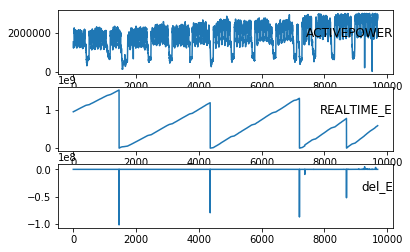

In [42]:
from matplotlib import pyplot

i = 1

pyplot.figure()
for group in groups:
        pyplot.subplot(len(groups), 1, i)
        pyplot.plot(values[:, group])
        pyplot.title(df.columns[group], y=0.5, loc='right')
        i += 1

pyplot.show()

In [43]:
len(df.index.get_duplicates())

/home/bosch/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  """Entry point for launching an IPython kernel.


0

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [46]:
tf.__version__

'1.8.0'

In [47]:
df

,ACTIVEPOWER,REALTIME_E,del_E
TIME,,,
2018-02-14 00:00:00,1.523714e+06,9.536996e+08,25393.785714
2018-02-14 00:15:00,1.505400e+06,9.540673e+08,24990.200000
2018-02-14 00:30:00,1.355000e+06,9.544247e+08,22808.333333
2018-02-14 00:45:00,1.272400e+06,9.547547e+08,21274.266667
2018-02-14 01:00:00,1.348133e+06,9.550809e+08,22398.933333
2018-02-14 01:15:00,1.237200e+06,9.554038e+08,20712.266667
2018-02-14 01:30:00,1.222533e+06,9.557127e+08,20346.800000
2018-02-14 01:45:00,1.299533e+06,9.560250e+08,21605.600000
2018-02-14 02:00:00,1.205600e+06,9.563400e+08,20190.333333


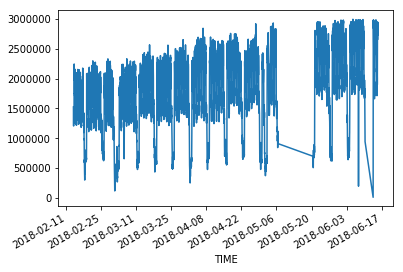

In [48]:
df['ACTIVEPOWER'].plot()

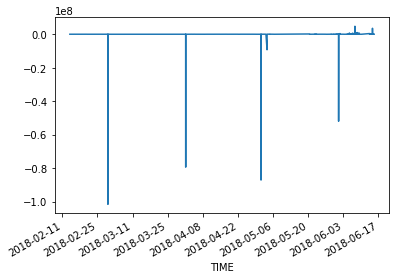

In [49]:
df['del_E'].plot()

In [50]:
df.shape

(9698, 3)

In [51]:
#df.drop(('ID'), axis=1, inplace=True)

In [52]:
df.drop(('del_E'), axis=1, inplace=True)
df

,ACTIVEPOWER,REALTIME_E
TIME,,
2018-02-14 00:00:00,1.523714e+06,9.536996e+08
2018-02-14 00:15:00,1.505400e+06,9.540673e+08
2018-02-14 00:30:00,1.355000e+06,9.544247e+08
2018-02-14 00:45:00,1.272400e+06,9.547547e+08
2018-02-14 01:00:00,1.348133e+06,9.550809e+08
2018-02-14 01:15:00,1.237200e+06,9.554038e+08
2018-02-14 01:30:00,1.222533e+06,9.557127e+08
2018-02-14 01:45:00,1.299533e+06,9.560250e+08
2018-02-14 02:00:00,1.205600e+06,9.563400e+08


In [53]:
#df.drop(('METER_ID'), axis=1, inplace=True)
df.drop(('REALTIME_E'), axis=1, inplace=True)
df

,ACTIVEPOWER
TIME,
2018-02-14 00:00:00,1.523714e+06
2018-02-14 00:15:00,1.505400e+06
2018-02-14 00:30:00,1.355000e+06
2018-02-14 00:45:00,1.272400e+06
2018-02-14 01:00:00,1.348133e+06
2018-02-14 01:15:00,1.237200e+06
2018-02-14 01:30:00,1.222533e+06
2018-02-14 01:45:00,1.299533e+06
2018-02-14 02:00:00,1.205600e+06


In [54]:
df.shape

(9698, 1)

In [55]:
df['Hour'] = df.index.hour
df['Minute'] = df.index.minute
df['Weekday'] = df.index.weekday
df

,ACTIVEPOWER,Hour,Minute,Weekday
TIME,,,,
2018-02-14 00:00:00,1.523714e+06,0,0,2
2018-02-14 00:15:00,1.505400e+06,0,15,2
2018-02-14 00:30:00,1.355000e+06,0,30,2
2018-02-14 00:45:00,1.272400e+06,0,45,2
2018-02-14 01:00:00,1.348133e+06,1,0,2
2018-02-14 01:15:00,1.237200e+06,1,15,2
2018-02-14 01:30:00,1.222533e+06,1,30,2
2018-02-14 01:45:00,1.299533e+06,1,45,2
2018-02-14 02:00:00,1.205600e+06,2,0,2


In [56]:
shift_days = 1
shift_steps = shift_days * 96  # Number of hours.

In [57]:
df

,ACTIVEPOWER,Hour,Minute,Weekday
TIME,,,,
2018-02-14 00:00:00,1.523714e+06,0,0,2
2018-02-14 00:15:00,1.505400e+06,0,15,2
2018-02-14 00:30:00,1.355000e+06,0,30,2
2018-02-14 00:45:00,1.272400e+06,0,45,2
2018-02-14 01:00:00,1.348133e+06,1,0,2
2018-02-14 01:15:00,1.237200e+06,1,15,2
2018-02-14 01:30:00,1.222533e+06,1,30,2
2018-02-14 01:45:00,1.299533e+06,1,45,2
2018-02-14 02:00:00,1.205600e+06,2,0,2


In [58]:
df['ACTIVEPOWER'].head(shift_steps + 5)

TIME
2018-02-14 00:00:00    1.523714e+06
2018-02-14 00:15:00    1.505400e+06
2018-02-14 00:30:00    1.355000e+06
2018-02-14 00:45:00    1.272400e+06
2018-02-14 01:00:00    1.348133e+06
2018-02-14 01:15:00    1.237200e+06
2018-02-14 01:30:00    1.222533e+06
2018-02-14 01:45:00    1.299533e+06
2018-02-14 02:00:00    1.205600e+06
2018-02-14 02:15:00    1.281667e+06
2018-02-14 02:30:00    1.331333e+06
2018-02-14 02:45:00    1.384533e+06
2018-02-14 03:00:00    1.407867e+06
2018-02-14 03:15:00    1.452067e+06
2018-02-14 03:30:00    1.440467e+06
2018-02-14 03:45:00    1.412333e+06
2018-02-14 04:00:00    1.345200e+06
2018-02-14 04:15:00    1.251733e+06
2018-02-14 04:30:00    1.278533e+06
2018-02-14 04:45:00    1.377933e+06
2018-02-14 05:00:00    1.406533e+06
2018-02-14 05:15:00    1.393133e+06
2018-02-14 05:30:00    1.363533e+06
2018-02-14 05:45:00    1.252800e+06
2018-02-14 06:00:00    1.371867e+06
2018-02-14 06:15:00    1.532000e+06
2018-02-14 06:30:00    1.830067e+06
2018-02-14 06:45:00    

In [59]:
df_targets = df['ACTIVEPOWER'].shift(-shift_steps)
df_targets

#Check it again, shifting is wrong so think about it once

TIME
2018-02-14 00:00:00    1.347400e+06
2018-02-14 00:15:00    1.365733e+06
2018-02-14 00:30:00    1.351600e+06
2018-02-14 00:45:00    1.400000e+06
2018-02-14 01:00:00    1.455400e+06
2018-02-14 01:15:00    1.482667e+06
2018-02-14 01:30:00    1.413533e+06
2018-02-14 01:45:00    1.387800e+06
2018-02-14 02:00:00    1.364733e+06
2018-02-14 02:15:00    1.236333e+06
2018-02-14 02:30:00    1.227333e+06
2018-02-14 02:45:00    1.451667e+06
2018-02-14 03:00:00    1.559400e+06
2018-02-14 03:15:00    1.557467e+06
2018-02-14 03:30:00    1.557267e+06
2018-02-14 03:45:00    1.480067e+06
2018-02-14 04:00:00    1.397067e+06
2018-02-14 04:15:00    1.321200e+06
2018-02-14 04:30:00    1.369200e+06
2018-02-14 04:45:00    1.317733e+06
2018-02-14 05:00:00    1.350400e+06
2018-02-14 05:15:00    1.344200e+06
2018-02-14 05:30:00    1.218067e+06
2018-02-14 05:45:00    1.235000e+06
2018-02-14 06:00:00    1.465933e+06
2018-02-14 06:15:00    1.780400e+06
2018-02-14 06:30:00    2.011467e+06
2018-02-14 06:45:00    

In [60]:
df_targets.tail()

TIME
2018-06-15 09:00:00   NaN
2018-06-15 09:15:00   NaN
2018-06-15 09:30:00   NaN
2018-06-15 09:45:00   NaN
2018-06-15 10:00:00   NaN
Name: ACTIVEPOWER, dtype: float64

In [61]:
x_data = df.values[0:-shift_steps]

In [62]:
x_data
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (9602, 4)


In [63]:
y_data = df_targets.values[:-shift_steps]

In [64]:
y_data
print(type(y_data))
print("Shape:", y_data.shape)
y_data = np.array(y_data).reshape((len(y_data), 1))

<class 'numpy.ndarray'>
Shape: (9602,)


In [65]:
num_data = len(x_data)
num_data

9602

In [66]:
train_split = 0.9
num_train = int(train_split * num_data)
num_train

8641

In [67]:
num_test = num_data - num_train
num_test

961

In [68]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

9602

In [69]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

9602

In [70]:
num_x_signals = x_data.shape[1]
num_x_signals

4

In [71]:
num_y_signals = y_data.shape[1]
num_y_signals

1

In [72]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)

In [73]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [74]:
x_test_scaled = x_scaler.transform(x_test)

In [75]:
print (y_train.shape)
y_train = np.array(y_train).reshape((len(y_train), 1))
y_test = np.array(y_test).reshape((len(y_test), 1))
print (y_train.shape)
y_test.shape

(8641, 1)
(8641, 1)


(961, 1)

In [76]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [77]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(8641, 4)
(8641, 1)


In [78]:
def batch_generator(batch_size, sequence_length):

    # Infinite loop.
    while True:
        
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [79]:
batch_size = 50

In [80]:
sequence_length = 96 * 7 * 0.75
sequence_length = (int) (sequence_length)
sequence_length

504

In [81]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [82]:
x_batch, y_batch = next(generator)

In [83]:
print(x_batch.shape)
print(y_batch.shape)

(50, 504, 4)
(50, 504, 1)


[0.1163  0.1173  0.1113  0.1088  0.1119  0.1222  0.12396 0.125   0.11163
 0.10095 0.10956 0.1042  0.1063  0.1043  0.10474 0.1313  0.1592  0.1477
 0.1348  0.1387  0.12213 0.1195  0.1277  0.1202  0.1133  0.1307  0.1385
 0.1321  0.10785 0.1224  0.174   0.1792  0.258   0.2544  0.2605  0.2307
 0.2366  0.246   0.2551  0.204   0.2091  0.1748  0.1655  0.1403  0.1301
 0.138   0.1293  0.1225  0.1207  0.10706 0.1029  0.05936 0.061   0.05286
 0.06824 0.0862  0.08405 0.0763  0.0755  0.0774  0.0895  0.10846 0.1081
 0.1037  0.09894 0.1022  0.1289  0.11505 0.1287  0.1438  0.1338  0.1445
 0.137   0.1388  0.1411  0.1412  0.1451  0.1495  0.1504  0.1426  0.1412
 0.1317  0.13    0.1335  0.1353  0.1385  0.1404  0.1309  0.143   0.135
 0.1317  0.1267  0.1564  0.1775  0.1691  0.1572  0.1458  0.1359  0.1459
 0.1378  0.1345  0.1329  0.1278  0.1313  0.1315  0.1302  0.1364  0.1555
 0.1512  0.14    0.1373  0.1335  0.1324  0.1334  0.1301  0.1351  0.1383
 0.163   0.167   0.1812  0.2229  0.2673  0.263   0.348   0.4407

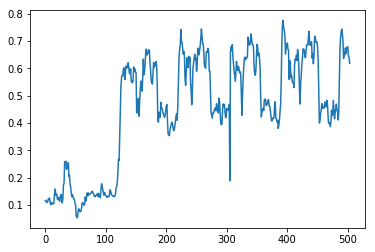

In [84]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 3 input-signals.
seq = x_batch[batch, :, signal]
print (seq)
plt.plot(seq)

[0.1453 0.1355 0.1455 0.1373 0.1342 0.1326 0.1274 0.131  0.1311 0.1299
 0.136  0.155  0.1509 0.1396 0.137  0.1332 0.1321 0.133  0.1298 0.1348
 0.138  0.1625 0.1665 0.1807 0.2223 0.2666 0.2622 0.347  0.4395 0.531
 0.5654 0.5723 0.5703 0.5957 0.5996 0.571  0.5566 0.6055 0.6006 0.599
 0.612  0.618  0.6006 0.5806 0.578  0.5957 0.55   0.552  0.5454 0.552
 0.6025 0.588  0.595  0.5835 0.583  0.436  0.4353 0.4875 0.4475 0.423
 0.481  0.5254 0.552  0.5454 0.5146 0.5645 0.6313 0.5737 0.589  0.614
 0.658  0.668  0.646  0.656  0.6533 0.666  0.6626 0.6187 0.5923 0.5522
 0.5464 0.5405 0.5825 0.6196 0.601  0.6157 0.6074 0.6226 0.6113 0.536
 0.4092 0.4019 0.4382 0.42   0.42   0.4744 0.455  0.453  0.4424 0.431
 0.4277 0.4197 0.427  0.4429 0.4612 0.4656 0.4019 0.358  0.356  0.3523
 0.3716 0.3833 0.393  0.4019 0.3987 0.3855 0.371  0.373  0.3865 0.404
 0.422  0.433  0.4087 0.4604 0.546  0.634  0.6675 0.6797 0.7397 0.6978
 0.6914 0.6714 0.651  0.6597 0.6396 0.5557 0.536  0.584  0.636  0.6147
 0.6    0.642 

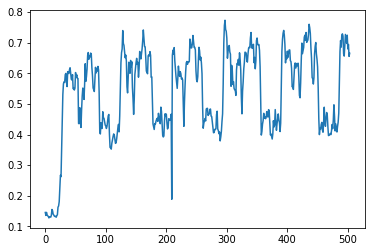

In [85]:
seq = y_batch[batch, :, signal]
print (seq)
plt.plot(seq)

In [86]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [87]:
model = Sequential()

In [88]:
model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(None, num_x_signals,)))


In [89]:
model.add(Dense(num_y_signals, activation='sigmoid'))

In [90]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [91]:
warmup_steps = 40

In [92]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)
    
    print ("loss is ")
    print (loss)
    
    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [93]:
optimizer = RMSprop(lr=1e-3)

In [94]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

loss is 
Tensor("loss/dense_1_loss/mean_squared_error/value:0", shape=(), dtype=float32)


In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 512)         794112    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           513       
Total params: 794,625
Trainable params: 794,625
Non-trainable params: 0
_________________________________________________________________


In [96]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [97]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

In [98]:
callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [99]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

In [100]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [101]:
%%time
model.fit_generator(generator=generator,
                    epochs=20,
                    steps_per_epoch=100,
                    validation_data=validation_data,
                    callbacks=callbacks)

Epoch 1/20
 99/100 [============================>.] - ETA: 9s - loss: 0.0408 
Epoch 00001: val_loss improved from inf to 0.05873, saving model to 23_checkpoint.keras
100/100 [==============================] - 953s 10s/step - loss: 0.0407 - val_loss: 0.0587
Epoch 2/20
 99/100 [============================>.] - ETA: 8s - loss: 0.0320 
Epoch 00002: val_loss did not improve

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 845s 8s/step - loss: 0.0319 - val_loss: 0.0643
Epoch 3/20
 99/100 [============================>.] - ETA: 8s - loss: 0.0190 
Epoch 00003: val_loss improved from 0.05873 to 0.05205, saving model to 23_checkpoint.keras
100/100 [==============================] - 849s 8s/step - loss: 0.0189 - val_loss: 0.0521
Epoch 4/20
 99/100 [============================>.] - ETA: 8s - loss: 0.0158 
Epoch 00004: val_loss did not improve

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001.
100/100 [====

In [102]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [103]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 2s 2s/step


In [104]:
print("loss (test-set):", result)

loss (test-set): 0.04639033228158951


In [105]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [106]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(1):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel('ACTIVEPOWER')
        plt.legend()
        plt.show()

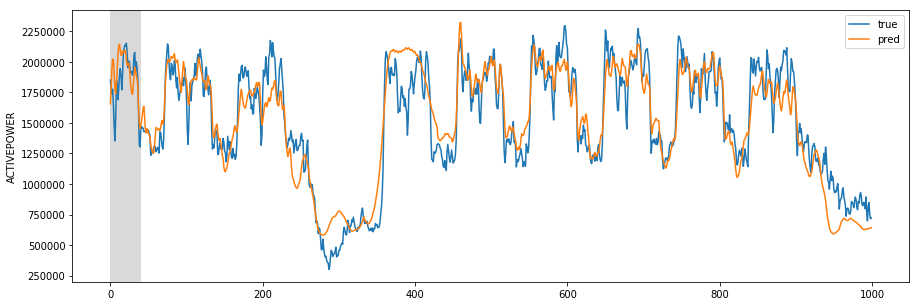

In [109]:
plot_comparison(start_idx=50, length=1000, train=True)

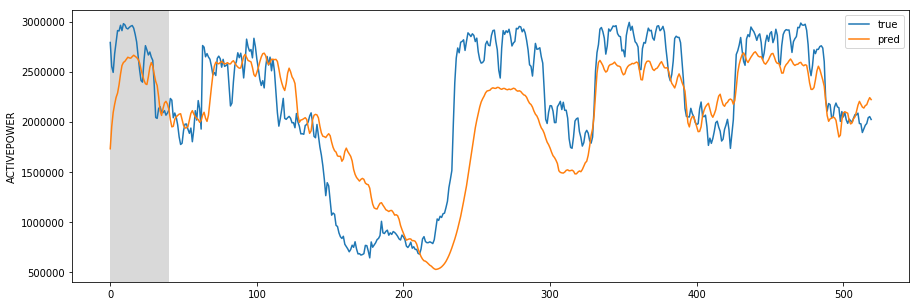

In [108]:
plot_comparison(start_idx=0, length=520, train=False)